# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
sinasc_raw = pd.read_csv('dados/SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [4]:
agrupamento = sinasc_raw.groupby('munResNome')
agrupamento.agg({'IDADEMAE':[('Média', 'mean')],'IDADEPAI':[('Media', 'mean')]})

,IDADEMAE,IDADEPAI
,Média,Media
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [5]:
#YYYY/mm/dd
sinasc_peso = sinasc_raw[sinasc_raw['DTNASC'] == '2019-08-21'].groupby(['DTNASC', 'SEXO', 'ESCMAE'])['PESO'].mean().to_frame()
sinasc_peso

PESO
DTNASC     SEXO      ESCMAE                      
2019-08-21 Feminino  1 a 3 anos       3685.000000
                     12 anos ou mais  3442.916667
                     4 a 7 anos       3274.000000
                     8 a 11 anos      3252.500000
           Masculino 12 anos ou mais  2648.750000
                     4 a 7 anos       3407.000000
                     8 a 11 anos      3439.000000

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [6]:
print('Municípios em que nasceram menos bebês:\n')
print(sinasc_raw.munResNome.value_counts().sort_values())

Municípios em que nasceram menos bebês:

munResNome
Município ignorado - RO         1
Castanheiras                   32
Pimenteiras do Oeste           40
Primavera de Rondônia          43
Parecis                        44
Rio Crespo                     50
São Felipe D'Oeste             54
Teixeirópolis                  64
Cacaulândia                    75
Cabixi                         80
Vale do Paraíso                81
Ministro Andreazza             84
Vale do Anari                  93
Theobroma                      97
Novo Horizonte do Oeste        98
Santa Luzia D'Oeste            99
Nova União                    104
Itapuã do Oeste               109
Governador Jorge Teixeira     112
Corumbiara                    127
Alto Alegre dos Parecis       154
Chupinguaia                   162
Mirante da Serra              164
Campo Novo de Rondônia        166
Seringueiras                  168
Urupá                         170
Monte Negro                   199
Alvorada D'Oeste              

In [7]:
sinasc_1 = sinasc_raw.groupby(['munResNome']).agg({'IDADEMAE': [('Idade Média','mean'), ('Idade Maxima','max'), ('Idade Minima','min')], 
'IDADEPAI': [('Idade Média','mean'), ('Idade Maxima','max'), ('Idade Minima','min')]})
sinasc_1

IDADEMAE                              IDADEPAI  \
                          Idade Média Idade Maxima Idade Minima Idade Média   
munResNome                                                                    
Alta Floresta D'Oeste       25.991826           53           14   29.548701   
Alto Alegre dos Parecis     24.844156           41           14   29.179104   
Alto Paraíso                24.960177           42           11   28.833333   
Alvorada D'Oeste            25.770732           44           15   30.757282   
Ariquemes                   25.607866           44           13   32.466667   
Buritis                     25.559177           44           14   30.812500   
Cabixi                      26.037500           39           13   34.333333   
Cacaulândia                 25.546667           42           16   36.333333   
Cacoal                      26.890102           47           14   30.931854   
Campo Novo de Rondônia      24.825301           40           13   30.500000   
Candeias do Jamari          25.243323           45           14   29.894737   
Castanheiras                27.281250           39           17   30.392857   
Cerejeiras                  27.240506           53           15   31.652778   
Chupinguaia                 25.333333           42           13   29.629630   
Colorado do Oeste           27.602804           47           15   34.354839   
Corumbiara                  24.716535           43           15   32.470588   
Costa Marques               24.412017           41           12   30.613636   
Cujubim                     24.482927           42           14   31.400000   
Espigão D'Oeste             26.093333           44           14   31.198113   
Governador Jorge Teixeira   24.401786           41           13   29.222222   
Guajará-Mirim               25.462228           43           13   30.470588   
Itapuã do Oeste             26.064220           46           15   42.500000   
Jaru                        25.982974           45           12   32.197183   
Ji-Paraná                   26.361137           44           12   31.132239   
Machadinho D'Oeste          25.480000           44           13   31.326923   
Ministro Andreazza          27.904762           44           17   33.849315   
Mirante da Serra            26.304878           46           14   32.154762   
Monte Negro                 25.648241           40           14   34.678571   
Município ignorado - RO     24.000000           24           24   22.000000   
Nova Brasilândia D'Oeste    26.222222           51           15   30.520833   
Nova Mamoré                 25.326389           46           14   31.692308   
Nova União                  26.894231           39           16   31.371429   
Novo Horizonte do Oeste     26.938776           41           15   31.588235   
Ouro Preto do Oeste         26.375594           44           14   31.233244   
Parecis                     26.454545           41           16   32.473684   
Pimenta Bueno               25.199675           47           13   29.745174   
Pimenteiras do Oeste        25.075000           40           14   35.600000   
Porto Velho                 26.312670           47           12   32.352679   
Presidente Médici           25.796053           44           14   30.150754   
Primavera de Rondônia       27.023256           39           16   31.888889   
Rio Crespo                  26.660000           39           16   28.000000   
Rolim de Moura              26.600863           44           14   30.360479   
Santa Luzia D'Oeste         26.121212           41           15   30.703297   
Seringueiras                24.910714           42           14   30.500000   
São Felipe D'Oeste          26.481481           41           17   31.395833   
São Francisco do Guaporé    25.660066           41           14   31.638889   
São Miguel do Guaporé       25.926346           42           14   32.666667   
Teixeirópolis               26.031250           39           16   31.500000   


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [7]:
sinasc_raw.DTNASC = pd.to_datetime(sinasc_raw.DTNASC)
sinasc_raw.DTNASC

0       2019-02-19
1       2019-02-21
2       2019-02-25
3       2019-03-20
4       2019-03-23
           ...    
27023   2019-12-13
27024   2019-10-04
27025   2019-08-02
27026   2019-12-23
27027   2019-12-27
Name: DTNASC, Length: 27028, dtype: datetime64[ns]

In [8]:
sinasc_mar = sinasc_raw[sinasc_raw.DTNASC.dt.month == 3].copy()
sinasc_mar['MES'] = sinasc_mar['DTNASC'].dt.month_name()
sinasc_mar['COUNT'] = 1
sinasc_2 = sinasc_mar.groupby(['MES','munResNome']).agg({'QTDFILVIVO': 
               [('Média','mean'), ('Maxima','max'), ('Minima','min')],
               'IDADEMAE': [('Média','mean'), ('Maxima','max'), ('Minima','min')],
               'IDADEPAI': [('Média','mean'), ('Maxima','max'), ('Minima','min')]})
sinasc_2

QTDFILVIVO                 IDADEMAE         \
                                     Média Maxima Minima      Média Maxima   
MES   munResNome                                                             
March Alta Floresta D'Oeste       0.903226    4.0    0.0  26.193548     35   
      Alto Alegre dos Parecis     0.888889    2.0    0.0  25.100000     36   
      Alto Paraíso                1.285714    3.0    0.0  24.818182     41   
      Alvorada D'Oeste            1.000000    3.0    0.0  25.772727     36   
      Ariquemes                   1.064748    4.0    0.0  25.304965     42   
      Buritis                     1.421053    4.0    0.0  25.406780     42   
      Cabixi                      0.833333    3.0    0.0  28.000000     36   
      Cacaulândia                 1.200000    4.0    0.0  26.200000     32   
      Cacoal                      0.969697    7.0    0.0  26.466165     40   
      Campo Novo de Rondônia      1.285714    2.0    0.0  22.153846     35   
      Candeias do Jamari          1.250000    4.0    0.0  24.363636     40   
      Castanheiras                1.750000    3.0    1.0  30.500000     35   
      Cerejeiras                  0.875000    2.0    0.0  27.062500     33   
      Chupinguaia                 1.055556    4.0    0.0  26.277778     42   
      Colorado do Oeste           1.000000    4.0    0.0  27.736842     39   
      Corumbiara                  0.909091    3.0    0.0  24.083333     37   
      Costa Marques               1.208333    4.0    0.0  25.666667     36   
      Cujubim                     1.294118    5.0    0.0  24.882353     40   
      Espigão D'Oeste             1.386364    6.0    0.0  25.409091     43   
      Governador Jorge Teixeira   0.555556    2.0    0.0  24.500000     33   
      Guajará-Mirim               1.534247    8.0    0.0  26.333333     43   
      Itapuã do Oeste             1.285714    3.0    0.0  25.625000     39   
      Jaru                        1.025641    5.0    0.0  26.550000     40   
      Ji-Paraná                   0.828877    4.0    0.0  25.377660     44   
      Machadinho D'Oeste          1.000000    6.0    0.0  26.295455     43   
      Ministro Andreazza          1.166667    3.0    0.0  27.166667     35   
      Mirante da Serra            1.000000    2.0    0.0  24.888889     37   
      Monte Negro                 0.700000    3.0    0.0  25.650000     36   
      Nova Brasilândia D'Oeste    0.947368    3.0    0.0  26.650000     35   
      Nova Mamoré                 1.360000    6.0    0.0  24.207547     42   
      Nova União                  0.571429    1.0    0.0  23.428571     38   
      Novo Horizonte do Oeste     1.200000    2.0    1.0  29.000000     37   
      Ouro Preto do Oeste         1.014925    5.0    0.0  25.522388     44   
      Parecis                     1.833333    5.0    1.0  28.000000     37   
      Pimenta Bueno               0.836066    4.0    0.0  25.177419     39   
      Pimenteiras do Oeste        1.000000    2.0    0.0  23.000000     29   
      Porto Velho                 1.295056    9.0    0.0  26.596774     44   
      Presidente Médici           0.724138    3.0    0.0  25.344828     38   
      Primavera de Rondônia       1.200000    2.0    0.0  26.800000     33   
      Rio Crespo                  1.000000    3.0    0.0  28.888889     37   
      Rolim de Moura              0.724638    5.0    0.0  27.594203     41   
      Santa Luzia D'Oeste         0.428571    2.0    0.0  23.285714     27   
      Seringueiras                1.000000    2.0    0.0  25.473684     39   
      São Felipe D'Oeste          0.000000    0.0    0.0  23.600000     31   
      São Francisco do Guaporé    1.161290    6.0    0.0  25.677419     35   
      São Miguel do Guaporé       1.000000    4.0    0.0  26.365854     42   
      Teixeirópolis               0.333333    1.0    0.0  26.666667     32   
      Theobroma                   1.125000    2.0    0.0  26.875000     35   
      Urupá                       0.928571    2.0    0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [9]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [10]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [11]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

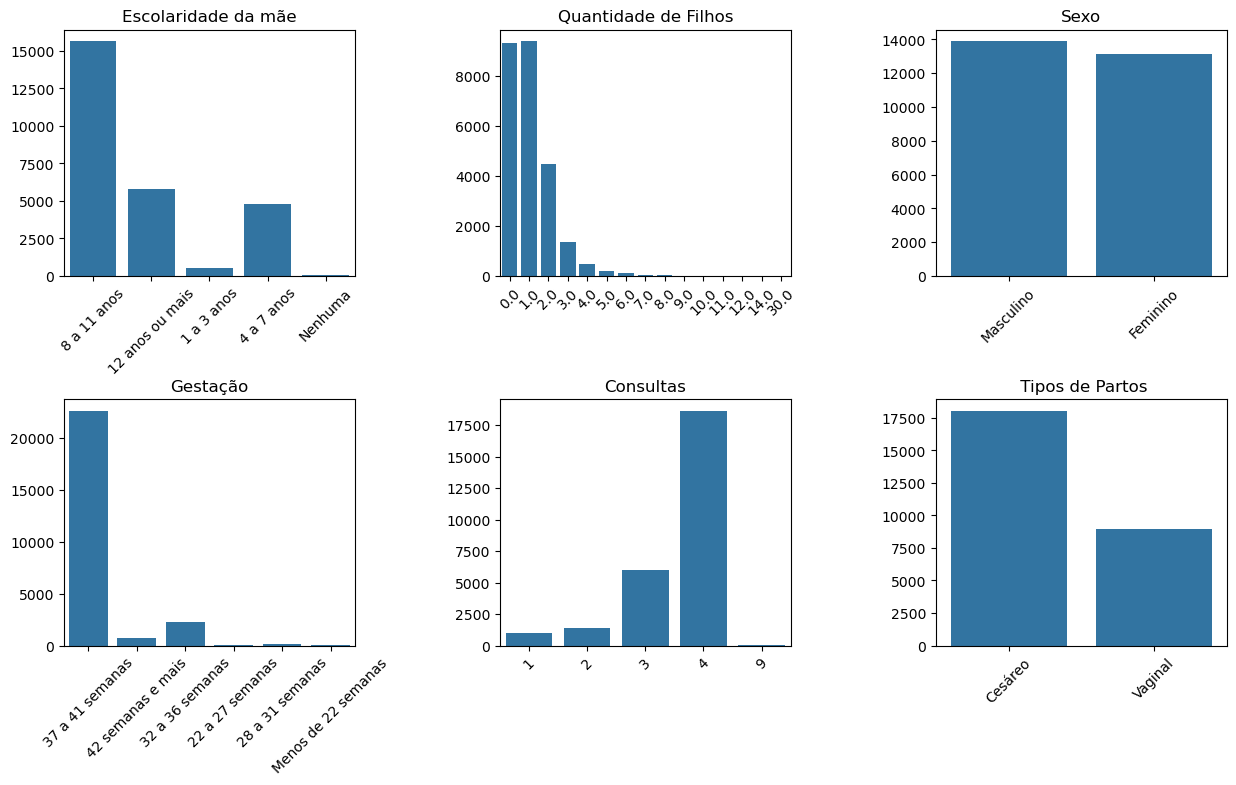

In [12]:
plt.close('all')

plt.rc('figure', figsize=(15, 8))
fig, axes = plt.subplots(2, 3)


sns.countplot(ax = axes[0, 0], x='ESCMAE', data=sinasc_raw)
axes[0, 0].set_title('Escolaridade da mãe')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('')
axes[0, 0].tick_params(axis='x', rotation=45)
sns.countplot(ax = axes[0, 1], x='QTDFILVIVO', data=sinasc_raw)
axes[0, 1].set_title('Quantidade de Filhos')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].tick_params(axis='x', rotation=45)
sns.countplot(ax = axes[0, 2], x='SEXO', data=sinasc_raw)
axes[0, 2].set_title('Sexo')
axes[0, 2].set_xlabel('')
axes[0, 2].set_ylabel('')
axes[0, 2].tick_params(axis='x', rotation=45)
sns.countplot(ax = axes[1, 0], x='GESTACAO', data=sinasc_raw)
axes[1, 0].set_title('Gestação')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')
axes[1, 0].tick_params(axis='x', rotation=45)
sns.countplot(ax = axes[1, 1], x='CONSULTAS', data=sinasc_raw)
axes[1, 1].set_title('Consultas')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')
axes[1, 1].tick_params(axis='x', rotation=45)
sns.countplot(ax = axes[1, 2], x='PARTO', data=sinasc_raw)
axes[1, 2].set_title(' Tipos de Partos')
axes[1, 2].set_xlabel('')
axes[1, 2].set_ylabel('')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()